In [1]:
# %pip install --upgrade --user xarray matplotlib numpy scipy pandas pyarrow

In [3]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import square, sawtooth, chirp

# Frequency Analysis with Numpy and Matplotlib

### Overview

Frequency analysis is key to understanding the patterns in time series data, like the kind we get from EEG or LFP readings. It's about measuring the signal's strength and how often certain patterns show up. The initial step in this process is to visualize the data in the frequency domain. This way, we can see which frequencies stand out and get a better understanding of distinct activities within the signal.

#### Analysis Goals

In this notebook, we will focus on practical methods for extracting the frequency information from various types of signals. We will explore composite signals created by combining multiple waveforms, making it more challenging to identify their constituent frequencies. Finally, we will demonstrate how to transform time-domain signals into the frequency domain using Python.

#### Learning Goals

We'll use Python's [**Numpy**](https://numpy.org/) and [**Scipy**](https://docs.scipy.org/) packages to generate signals and also transform them into the frequency domain, using `scipy.fft`, and visualize the results with [**Matplotlib**]().

---

## Generating Periodic Signals

Periodic waveforms play a vital role in neuroscience as models for rhythmic stimuli and neural oscillations. By generating such waveforms we can, for instance, simulate neural activity that exhibit periodic behavior in response to visual stimuli, such as flashing lights or gradual intensity changes, and can also use these signals to verify frequency analysis techniques.

This section provides a hands-on introduction to creating and visualizing periodic waveforms using the `scipy.signal` module. Through a series of exercises, we'll explore the characteristics of square and sawtooth waves at various frequencies. We will also explore generating chirp using the `chirp` method (a chirp is a signal in which the frequency increases ('up-chirp') or decreases ('down-chirp') with time). We will use the same `chirp` method to create cosine waves too!

In the following exercises we will Numpy and Scipy to generate the periodic signals, and Matplotlib to visualize them.

| Code                             | Description                                                                                   |
|----------------------------------|-----------------------------------------------------------------------------------------------|
| `np.pi`                          | The mathematical constant π, approximately 3.14159.                                           |
| `np.linspace(start, stop, n)`    | Generates an array of `n` evenly spaced values from `start` to `stop`.                        |
| `square(2 * np.pi * f * t)`      | Generates a square wave with frequency `f` over time array `t`.                               |
| `sawtooth(2 * np.pi * f * t)`    | Produces a sawtooth wave with frequency `f` over time array `t`.                              |
| `plt.plot(x, y)`                 | Plots the data in `y` against the corresponding values in `x`.                                |


**Example** Create a 1 Hz square wave sampled 100 times for 1 second.

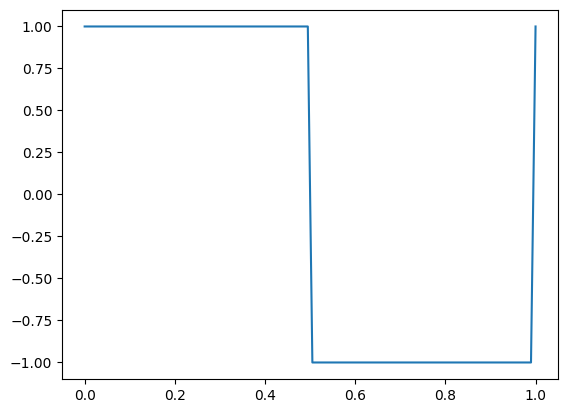

In [4]:
f = 1 # Hz
t = np.linspace(0, 1, 100)
w = square(2 * np.pi * f * t)
plt.plot(t, w)

This is a square wave of 1 Hz frequency. A frequency of `n` Hz means that the pattern you see above repeats `n` times in a second. Let's see that happen in the following exercises.

Create a 2 Hz square wave sampled 100 times for 1 second. How many repetitions of the pattern do you see here?

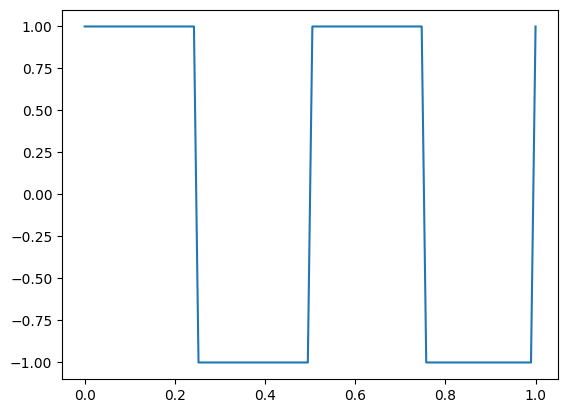

In [5]:
f = 2 # Hz
t = np.linspace(0,1,100)
w = square(2*np.pi*f*t)
plt.plot(t,w)

Create a 10 Hz square wave sampled 100 times for 1 second.

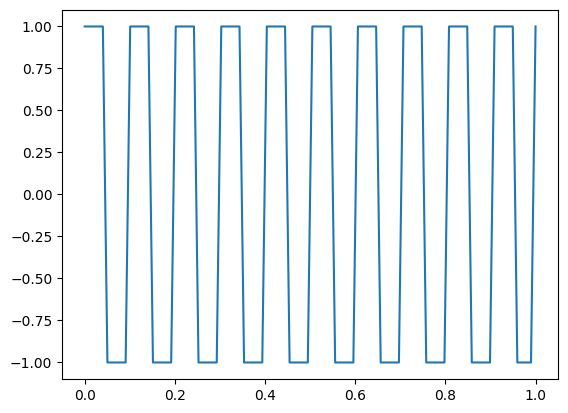

In [6]:
f = 10 # Hz
t = np.linspace(0,1,100)
w = square(2*np.pi*f*t)
plt.plot(t,w)

Using the `sawtooth` function, create a 5 Hz sawtooth signal sampled 100 times for 1 second.

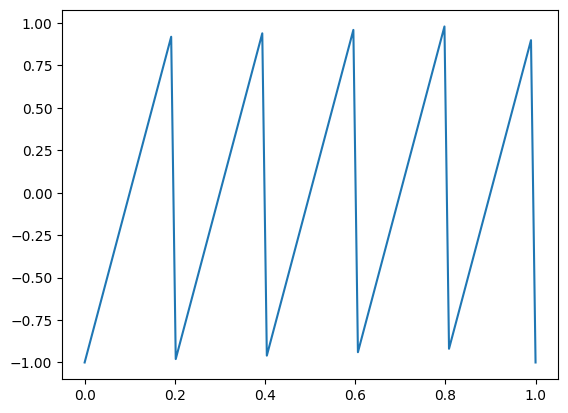

In [7]:
f = 5 # Hz
t = np.linspace(0,1,100)
w = sawtooth(2*np.pi*f*t)
plt.plot(t,w)

Numpy arrays are built for mathematical operations. For example, we can re-generate the signal we created before with double the magnitude simply by multiplying the signal `w` by $2$:

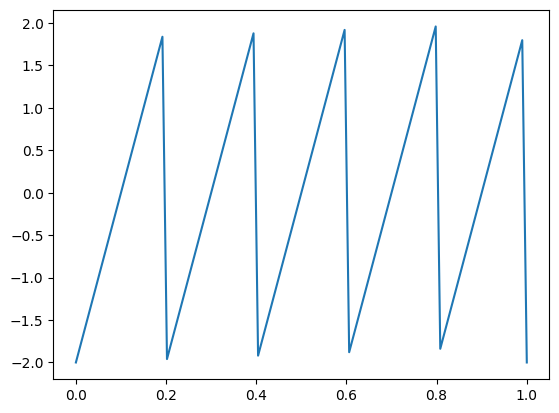

In [8]:
f = 5 # Hz
t = np.linspace(0,1,100)
w = sawtooth(2*np.pi*f*t)
w_double_magn = 2*w
plt.plot(t,w_double_magn)


Numpy package also provides many useful functions that we can use to transform our data. For instance `np.exp()` or `np.log()`.

Write the code for $z = \exp(t) \cdot w$, where $w$ is the sawtooth waveform and $t$ is time. Plot the resulting $z$ over time.

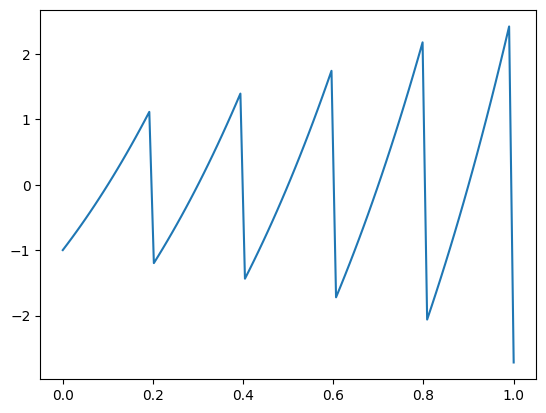

In [9]:
z = np.exp(t)*w
plt.plot(t,z)

### Chirp Signal

A chirp is a signal in which the frequency increases or decreases over time. In the context of the `scipy.signal.chirp` function, the signal starts at frequency `f0` and linearly changes to frequency `f1` by time `t1`. The rate of this frequency change can follow different methods; when the 'linear' method is used, the frequency changes at a constant rate.

Here is a summary table for the examples of chirp signals:

| Example               | Start Frequency (`f0`) | End Frequency (`f1`) | Time (`t1`) | Frequency Change        | Description                       |
|-----------------------|------------------------|----------------------|-------------|-------------------------|-----------------------------------|
| Constant Frequency    | 5 Hz                   | 5 Hz                 | 10 s        | None (Constant)         | A sine wave with a constant frequency. |
| Increasing Frequency  | 5 Hz                   | 10 Hz                | 10 s        | Linear Increase         | A sine wave that linearly increases in frequency over time. |
| Decreasing Frequency  | 10 Hz                  | 5 Hz                 | 10 s        | Linear Decrease         | A sine wave that linearly decreases in frequency over time. |

**Example** Generate constant frequency (1Hz) signal with `chirp`

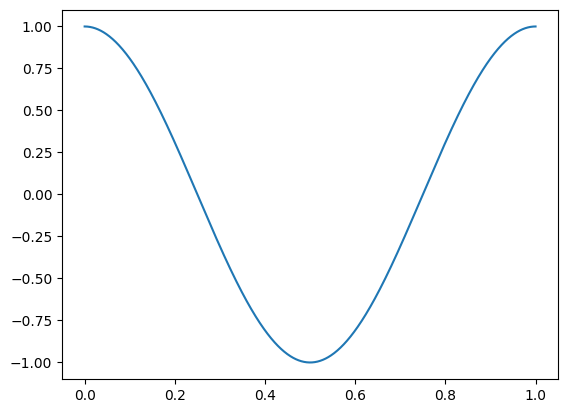

In [10]:
t = np.linspace(0, 1, 1000)
w = chirp(t, f0=1, f1=1, t1=1)
plt.plot(t, w)

Generate a chirp signal that starts at a frequency of 1 Hz and increases to 10 Hz over a duration of 1 second.

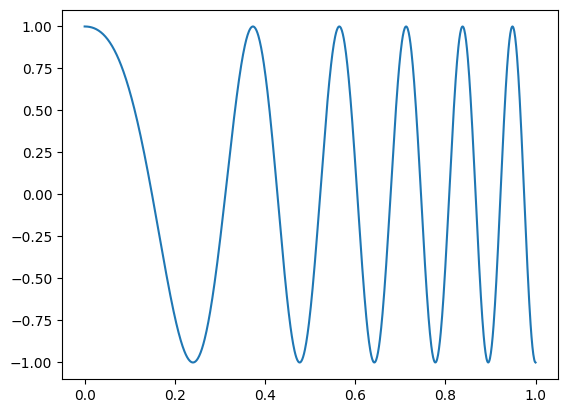

In [11]:
w= chirp(t,f0=1,f1=10,t1=1)
plt.plot(t,w)

Generate the same chirp signal as in the last exercise but with a decreasing frequency.

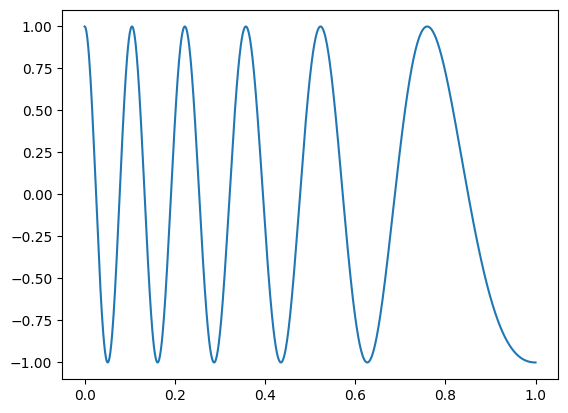

In [12]:
w= chirp(t,f0=10,f1=1,t1=1)
plt.plot(t,w)

What other options are available in the `chirp` function to control the change of frequency over time? Let's explore some of these methods by visualizing them in the same plot.

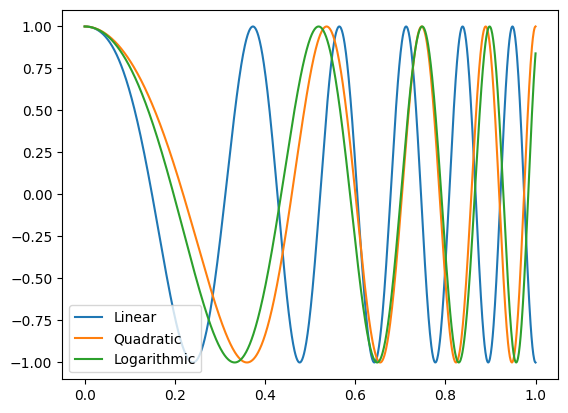

In [16]:
w= chirp(t,f0=1,f1=10,t1=1,method='linear')
plt.plot(t,w, label = 'Linear')
w= chirp(t,f0=1,f1=10,t1=1,method='quadratic')
plt.plot(t,w, label = 'Quadratic')
w= chirp(t,f0=1,f1=10,t1=1,method='logarithmic')
plt.plot(t,w, label = 'Logarithmic')
plt.legend()

Let's label each line plot so it's clear which line comes from which method. We can do this by:
1. setting the `label` argument of the `plt.plot()` function.
2. calling `plt.legend()` at the end to make the legend appear in the plot.

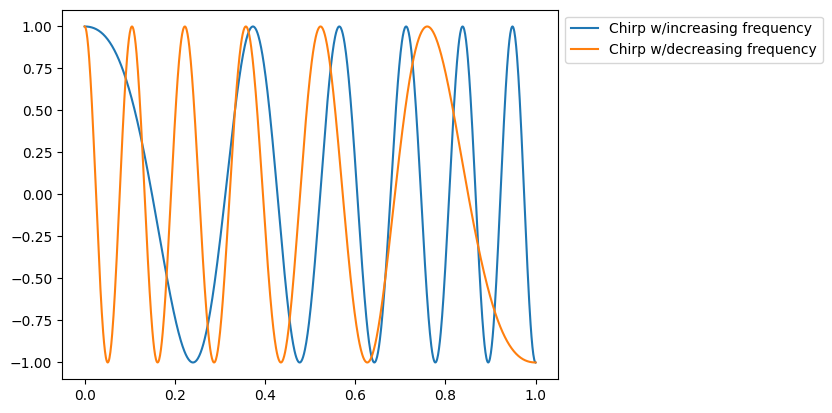

In [14]:
w= chirp(t,f0=1,f1=10,t1=1)
plt.plot(t,w, label = 'Chirp w/increasing frequency')
w= chirp(t,f0=10,f1=1,t1=1)
plt.plot(t,w, label='Chirp w/decreasing frequency')
plt.legend(bbox_to_anchor=(1,1))

As a final step let's make the figure wider so we can see the difference between the lines a bit more clearly. 

This is a fugure-level property that we want to change. We can specify figure-level properties using the function `plt.figure()` which will be placed in the very beginning of the visualization code.

Here, we want to change the figure size which we can do by setting the `figsize` argument: `plt.figure(figsize=(15, 3))`. The first value specifies the width, and the second value specified the height. Let's try it!

---

## Create Composite Signals

In this section, we will learn about combining multiple periodic signals together, creating more complex signals.

We will make use of matplotlib and how powerful it is in customizing plots


| Code | Description |
| ---- | ----------- |
| `np.linspace(start, stop, n_points)` | Create `n_points` equally spaced values between `start` and `stop`. |
| `plt.plot(x, y)` | Plot `x` on the x-axis and `y` on the y-axis. |
| `plt.xlabel('X-axis')` | Set the x-axis label as 'X-axis'. |
| `plt.ylabel('Y-axis')` | Set the y-axis label as 'Y-axis'. |
| `np.random.randn(n_points)` | Generate `n_points` random values drawn from a standard normal distribution. |

**Example** Create a composite wave from two square waves

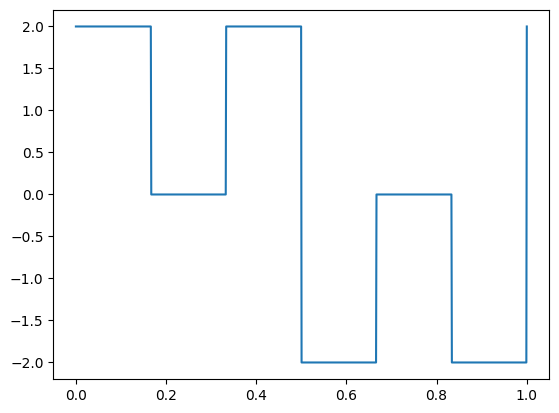

In [15]:
f1 = 1
f2 = 3
t = np.linspace(0, 1, 1000)
w1 = square(2 * np.pi * f1 * t)
w2 = square(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

Create composite wave made of a 2-Hz sawtooth and a 1-Hz square wave.

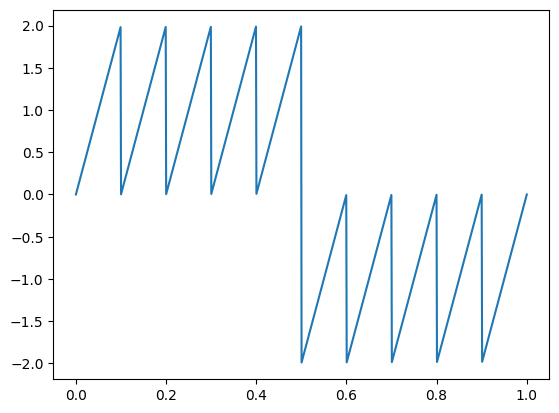

In [26]:
f1 = 1
f2 = 10
t = np.linspace(0, 1, 1000)
w1 = square(2 * np.pi * f1 * t)
w2 = sawtooth(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

**Example** Create a composite signal made of two chirps and add axis labels and title with legend

Text(0.5, 1.0, 'Composite signal of two chirps')

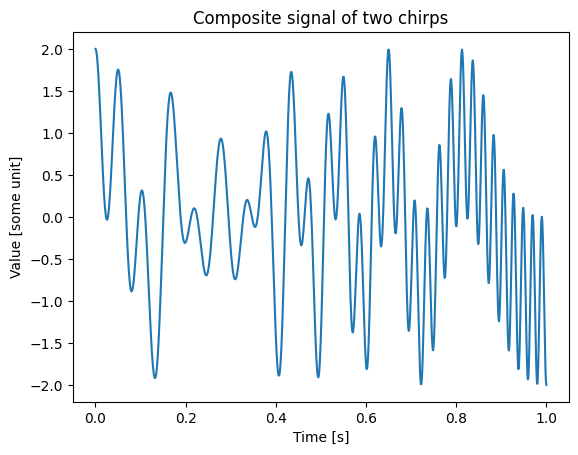

In [27]:
t = np.linspace(0, 1, 1000)

w1 = chirp(t, f0=20, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=50, t1=1)

plt.plot(t, w1+w2)

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Let's learn a bit more about matplotlib and optimize this figure further.

We already specified some "axes-level" properties in the last exercise. In the following exercises, Let's change both "figure-level" properties as well the the arguments in the plotting function to improve our plot.

Let's start by making the figure a bit wider as we did before.

In [28]:
t = np.linspace(0, 1, 1000)

w1 = chirp(t, f0=20, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=50, t1=1)

w = w1 + w2

Text(0.5, 1.0, 'Composite signal of two chirps')

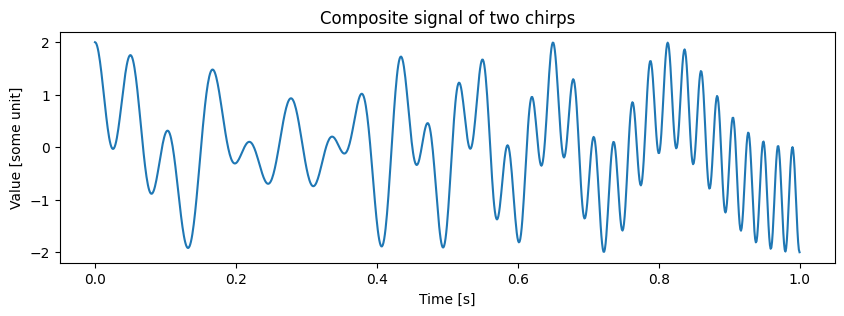

In [30]:
plt.figure(figsize=(10,3))

plt.plot(t,w)

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Make the line a bit thicker by setting the `linewidth` argument in the `plt.plot()` function.

Text(0.5, 1.0, 'Composite signal of two chirps')

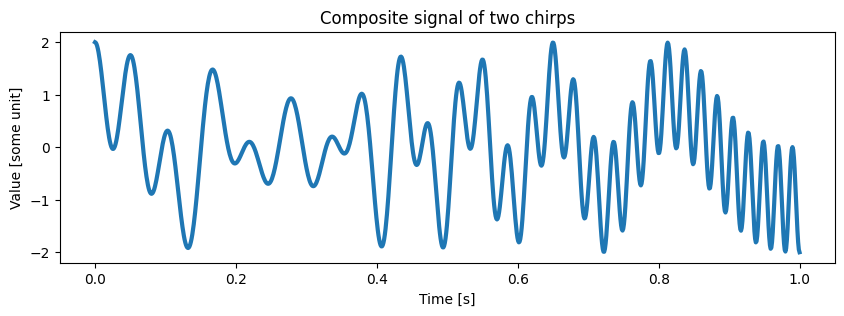

In [33]:
plt.figure(figsize=(10,3))

plt.plot(t,w,linewidth=3)

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Change the color to black by setting the `color` argument.

Text(0.5, 1.0, 'Composite signal of two chirps')

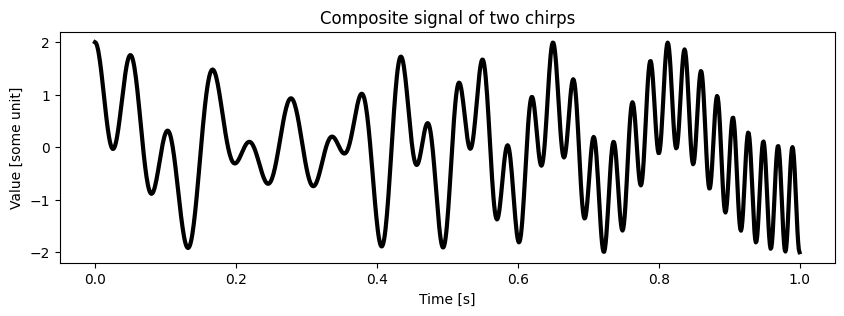

In [34]:
plt.figure(figsize=(10,3))

plt.plot(t,w,linewidth=3,color='black')

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Make the resolution higher by setting the "figure-level" property `dpi`. Let's try a dpi of 200 for instance.

Text(0.5, 1.0, 'Composite signal of two chirps')

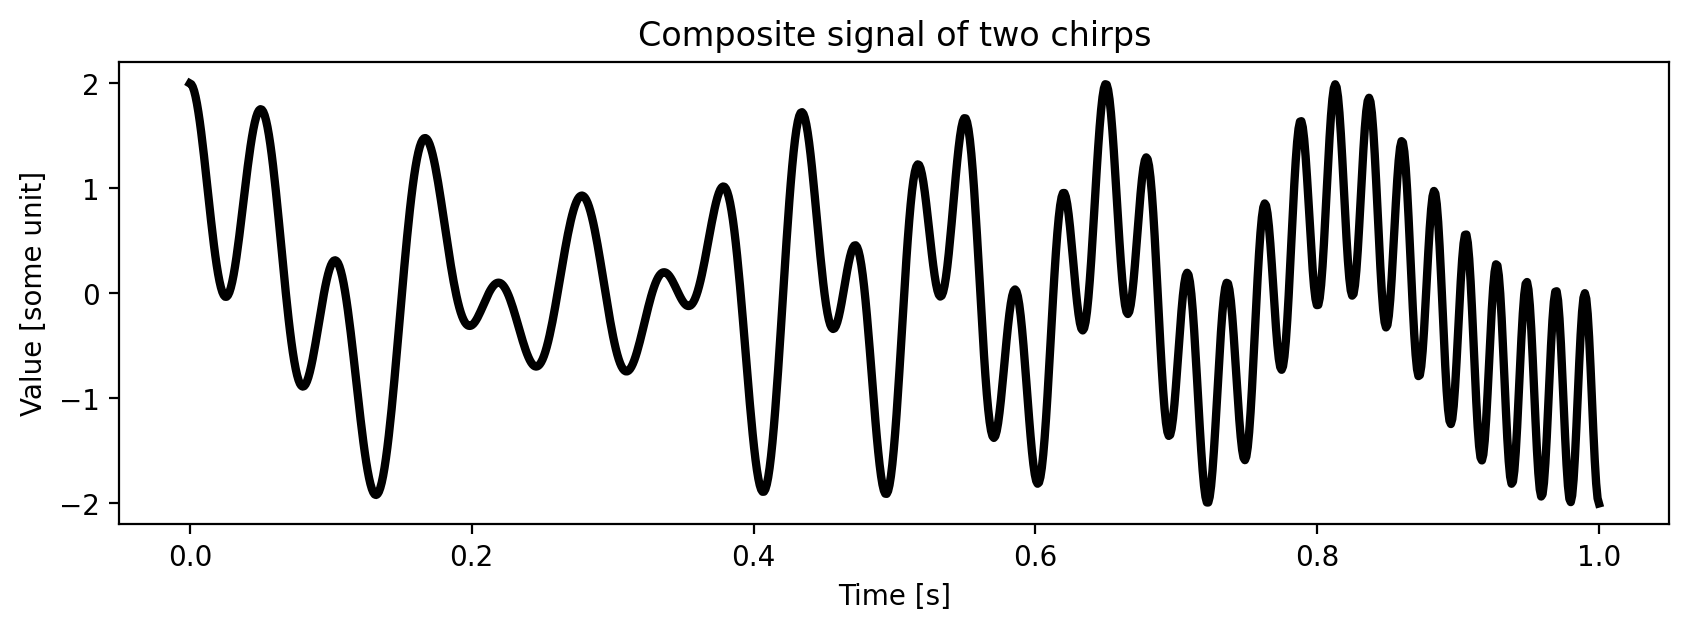

In [35]:
plt.figure(figsize=(10,3), dpi=200)

plt.plot(t,w,linewidth=3,color='black')

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

You can play around with the `figsize` and `dpi` to adjust the fontsize in the figure. For instance, a higher `dpi` combined with a lower `figsize` results in bigger fontsize. 

Text(0.5, 1.0, 'Composite signal of two chirps')

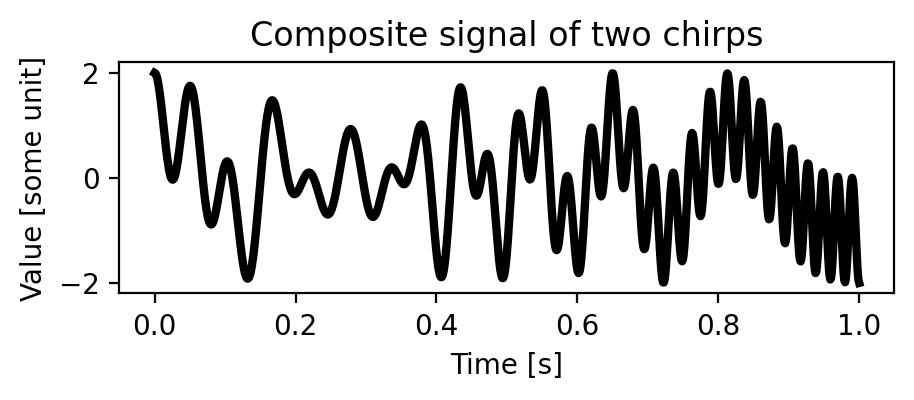

In [37]:
plt.figure(figsize=(5,1.5), dpi=200)

plt.plot(t,w,linewidth=3,color='black')

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

As a final step let's save the figure using the `plt.savefig()` method. 

**Hint:** to make sure all the elements of the plot are included in the saved figure set `bbox_inches="tight"` in the `plt.savefig()` function.

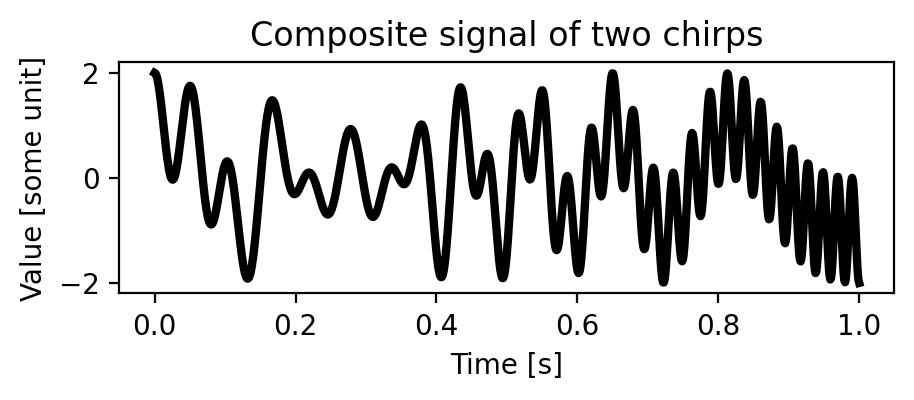

In [39]:
plt.figure(figsize=(5,1.5), dpi=200)

plt.plot(t,w,linewidth=3,color='black')

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

fig_dir = './Figures'

import os

if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

filename = 'composite_chirp_example.png'

savepath = os.path.join(fig_dir, filename)

plt.savefig(savepath, bbox_inches='tight')

---

## Frequency Analysis

In this section, we will learn how to identify frequencies of oscillation of a composite signal

Most of the signals we observe or measure is composed of more than one frequency. Frequency analysis is an important tool in breaking down a composite signal into its constituent frequencies. We can transform our data in the time domain into the frequency domain in four steps:
1. Perform a Fourier Transform on the signal 
2. Calculate the frequencies corresponding to the FFT result 
3. Since the FFT result is symmetric, filter out the negative frequencies. 
4. Calculate the magnitude of the FFT result for positive frequencies and scale the result by a factor of 2.0/len(alpha). 

<br>


| Code                                    | Description                                            |
| --------------------------------------- | ------------------------------------------------------ |
| `fft(some_signal)`                     | Step 1: Compute the Fast Fourier Transform of `some_signal`. This transforms the signal from the time domain to the frequency domain. |
| `fftfreq(len(some_signal), d=sampling_time)` | Step 2: Calculate the frequencies corresponding to the FFT result. `len(some_signal)` is the number of data points, and `sampling_time` is the time interval between samples. |
| `fft_freqs[fft_freqs > 0]`             | Step 3: Select only the positive frequencies from the `fft_freqs` array. This step filters out the negative frequencies. |
| `2.0/len(some_signal) * np.abs(fft_result[fft_freqs > 0])` | Step 4: Calculate the magnitude of the FFT result for positive frequencies. The factor `2.0/len(some_signal)` scales the result appropriately. |
| `plt.plot(x, y)` | Plot y values against x values. |
| `plt.subplot(nrows, ncols, nindex)` | `plt.subplot(211)` tells Python to create a grid of subplots with 2 rows and 1 column and to use the first subplot (top plot) for the current plotting commands. If you were to add another plotting command with plt.subplot(212), it would plot in the second subplot (bottom plot). |


**Example** Create a chirp signal with a constant frequency of 10 Hz, sampled 250 times between 0.01 s and 2.5 s. Let's compute the amplitude spectrum and also let's use subplots to plot both the time-domain as well as the frequency domain data.

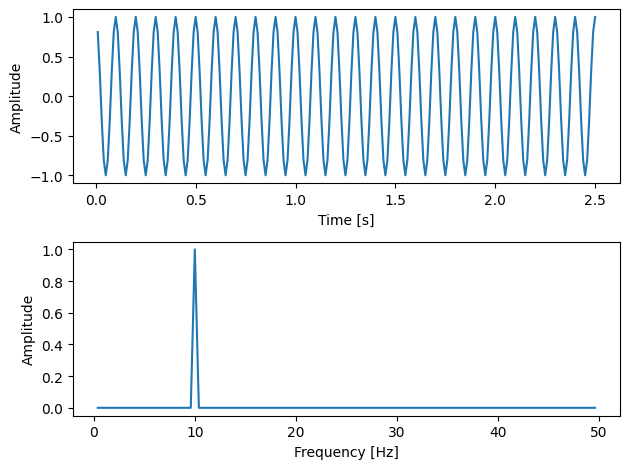

In [45]:
t = np.linspace(0.01, 2.5, 250)
w = chirp(t, f0=10, f1=10, t1=2.5)


## You just have to use the four lines for computing the amplitude spectrum
fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1] - t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = (2.0/len(w)) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the amplitude and scale it by a factor of 2.0/len(signal)
## Ends here

plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()

We generated a signal of 10 Hz frequency and we see a peak at 10 Hz in the frequency domain!

Generate a chirp signal that begins with frequency of 10 Hz and increases to 20 Hz over a period of 2.5 seconds and compute amplitude spectrum. Plot the signal and the amplitude spectrum.

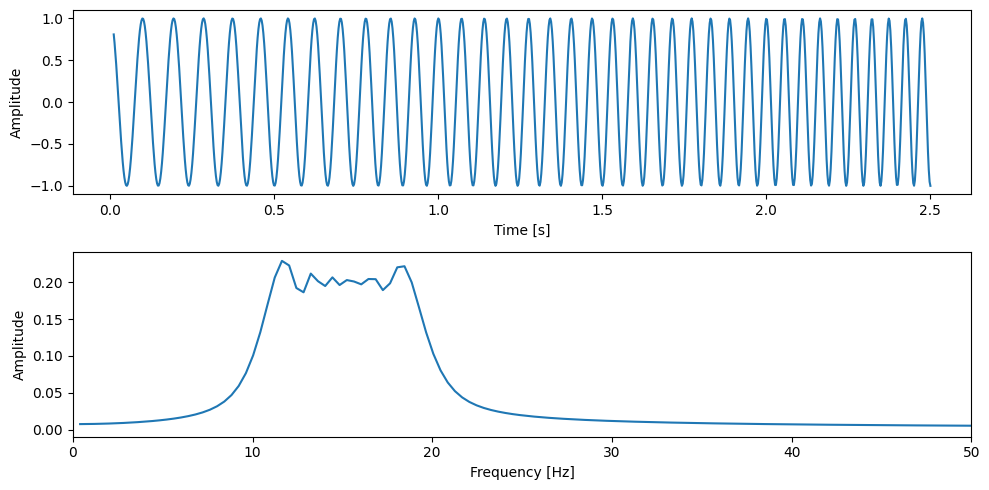

In [58]:
t = np.linspace(0.01, 2.5, 1000)
w = chirp(t, f0=10, f1=20, t1=2.5)

plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')


## You just have to use the four lines for computing the amplitude spectrum
fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1] - t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = (2.0/len(w)) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the amplitude and scale it by a factor of 2.0/len(signal)
## Ends here

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim([0,50])

plt.tight_layout()

 Since this is a chirp signal, we would expect to see a distribution of energy across a range of frequencies from 10 Hz up to 20 Hz. The plot would likely show a peak that starts at 10 Hz and extends or spreads toward 20 Hz

Generates a chirp signal that begins with frequency of 10 Hz and increases to 20 Hz over a period of 2.5 seconds and compute amplitude spectrum. Before you run the code, predict how the figure would look like

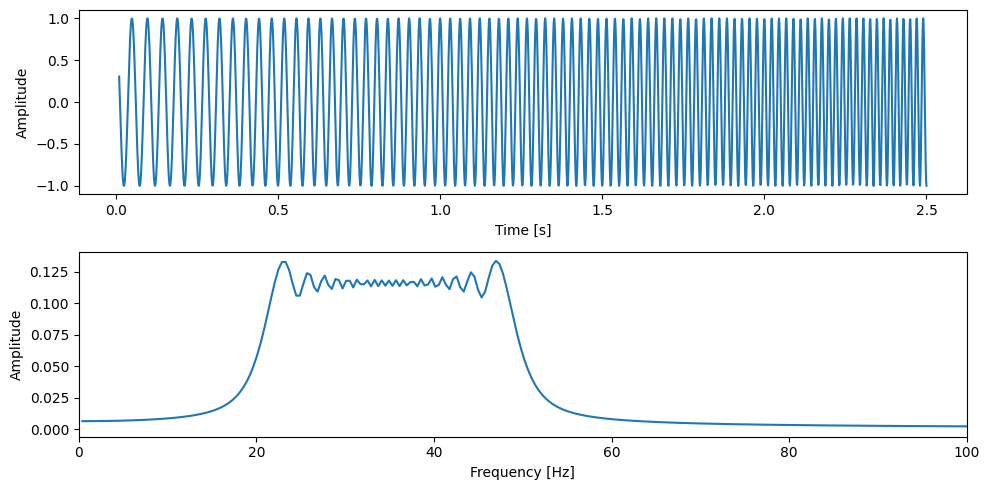

In [105]:
t = np.linspace(0.01, 2.5, 2000)
w = chirp(t, f0=20, f1=50, t1=2.5)

plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

## You just have to use the four lines for computing the amplitude spectrum
fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1]-t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = (2.0/len(w)) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the amplitude and scale it by a factor of 2.0/len(signal)
## Ends here

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim([0,100])

plt.tight_layout()

Create two constant frequency signals w1 and w2 at 10 Hz and 25 Hz respectively, which are then summed together to form a composite signal w. What can you interpret from this?

Use `t = np.linspace(0.01, 2.5, 250)`

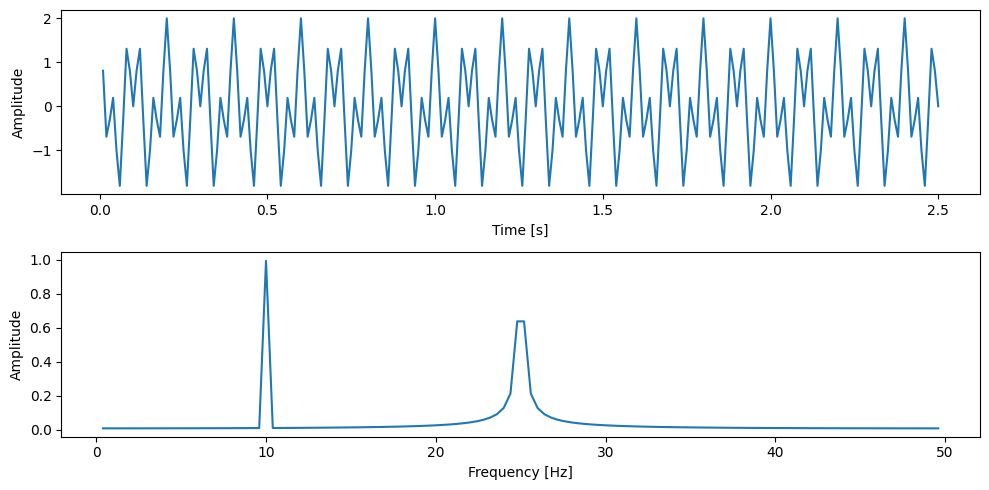

In [109]:
t = np.linspace(0.01, 2.5, 250)
f1 = 10; f2 = 25 # Hz
#w1 = np.sine(f1*t)
#w2 = np.sine(f2*t)
w1 = chirp(t, f0=10, f1=10, t1=2.5)
w2 = chirp(t, f0=25, f1=25, t1=2.5)
w = w1+w2

plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

## You just have to use the four lines for computing the amplitude spectrum
fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1]-t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = (2.0/len(w)) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the amplitude and scale it by a factor of 2.0/len(signal)
## Ends here

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
#plt.xlim([0,100])

plt.tight_layout()

You see two peaks here: One at 10 Hz representing w1 and one at 25 Hz representing w2. Even though w is a composite signal, frequency space can still separate them out.